In [1]:
import numpy as np
import random
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

In [2]:
def visualize(f, samples, elite_idx, i, x_range=(-6,6), y_range=(-6,6)):
    fig, ax = plt.subplots()
    Xs = np.linspace(*x_range, 100)
    Ys = np.linspace(*y_range, 100)

    Xs, Ys = np.meshgrid(Xs, Ys)
    vals = np.c_[Xs.ravel(), Ys.ravel()]
    Zs = np.reshape([f(val) for val in vals], (100, 100))
    cm = ax.pcolormesh(Xs, Ys, Zs, norm=LogNorm(vmin=Zs.min(), vmax=Zs.max()), cmap='viridis_r')

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    # Plot 
    ax.plot(samples[:,0], samples[:,1], "w.")
    ax.plot(samples[elite_idx,0], samples[elite_idx,1], "r.")

    #save pic
    fig.savefig("iteration" + str(i) + ".png");

In [3]:
def cross_entropy_method(f, mu, sigma, k_max, m=40, m_elite=10):
    for k in range(k_max):
        samples = np.random.multivariate_normal(mu, sigma, m)
        order = np.array([f(samples[i]) for i in range(m)])
        elite_idx = order.argsort()[:m_elite]
        visualize(f,samples, elite_idx, k+1)
        
        mu = np.mean(samples[elite_idx], axis=0)
        #sigma = np.cov(samples[elite_idx], rowvar=0)
        sigma = np.zeros_like(sigma)
        for i in range(m_elite):
            z = samples[elite_idx[i]] - mu
            z = z.reshape(-1, 1)
            sigma += (z @ z.T)
        sigma *= 1/m_elite
    return mu, sigma

In [4]:
def branin(x, a=1, b=5.1/(4*(np.pi**2)), c=5/np.pi, r=6, s=10, t=1/(8*np.pi)):
    return a*(x[1]-b*(x[0]**2)+c*x[0]-r)**2 + s*(1-t)*np.cos(x[0]) + s

C:\Users\LeHuy\AppData\Local\Temp/ipykernel_8752/3594626205.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cm = ax.pcolormesh(Xs, Ys, Zs, norm=LogNorm(vmin=Zs.min(), vmax=Zs.max()), cmap='viridis_r')
C:\Users\LeHuy\AppData\Local\Temp/ipykernel_8752/3594626205.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cm = ax.pcolormesh(Xs, Ys, Zs, norm=LogNorm(vmin=Zs.min(), vmax=Zs.max()), cmap='viridis_r')
C:\Users\LeHuy\AppData\Local\Temp/ipykernel_8752/359

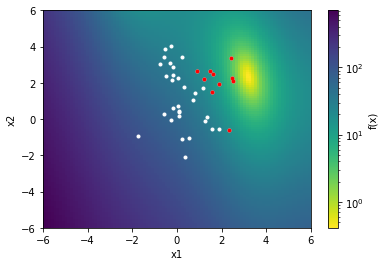

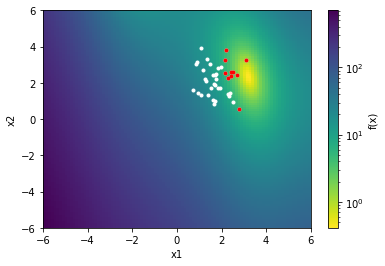

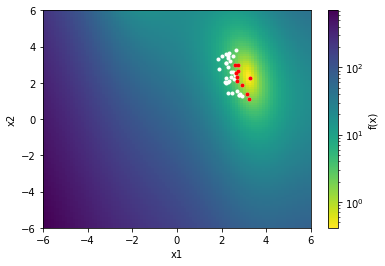

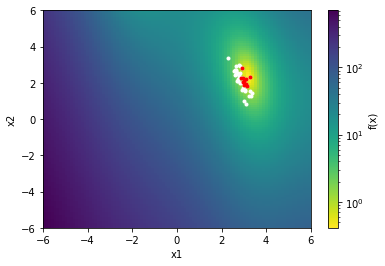

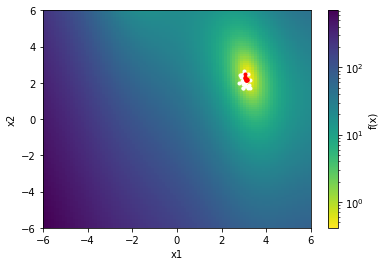

In [5]:
random.seed(10)
mu = [0.5, 1.5]
sigma = [[1.0, 0.2],[0.2, 2.0]]
k_max = 5
new_mu, new_sigma = cross_entropy_method(branin,mu,sigma,k_max)
#print(new_mu, new_sigma)